In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [23]:
df_deliveries=pd.read_csv("//deliveries.csv")
df_matches=pd.read_csv("//matches.csv")

In [24]:
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [25]:
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [26]:
df_deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [27]:
df_matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [28]:
df_matches_new=df_matches.dropna(subset=['winner'])

In [29]:
df_matches_new.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      0
venue                0
umpire1              2
umpire2              2
umpire3            634
dtype: int64

In [30]:
df_matches_new['city'].fillna('Dubai', inplace=True)

In [31]:
df_matches_new.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      0
venue                0
umpire1              2
umpire2              2
umpire3            634
dtype: int64

In [32]:
df_matches_new['umpire1'].fillna('No Umpire', inplace=True)
df_matches_new['umpire2'].fillna('No Umpire', inplace=True)
df_matches_new['umpire3'].fillna('No Umpire', inplace=True)

In [33]:
df_matches_new.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

In [34]:
df_matches_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 752 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               752 non-null    int64 
 1   season           752 non-null    int64 
 2   city             752 non-null    object
 3   date             752 non-null    object
 4   team1            752 non-null    object
 5   team2            752 non-null    object
 6   toss_winner      752 non-null    object
 7   toss_decision    752 non-null    object
 8   result           752 non-null    object
 9   dl_applied       752 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      752 non-null    int64 
 12  win_by_wickets   752 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            752 non-null    object
 15  umpire1          752 non-null    object
 16  umpire2          752 non-null    object
 17  umpire3          752 non-null    ob

In [35]:
df_matches_new.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,752.000000,752.00000,752.000000,752.000000,752.000000
mean,1784.746011,2013.43617,0.025266,13.353723,3.368351
std,3455.152925,3.36761,0.157036,23.513486,3.388114
min,1.000000,2008.00000,0.000000,0.000000,0.000000
25%,188.750000,2011.00000,0.000000,0.000000,0.000000
50%,377.500000,2013.00000,0.000000,0.000000,4.000000
75%,566.250000,2016.00000,0.000000,19.000000,6.000000
max,11415.000000,2019.00000,1.000000,146.000000,10.000000


In [36]:
df_matches_new['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [37]:
df_matches_new['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [38]:
df_matches_new['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [39]:
df_matches_new['toss_winner'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Sunrisers Hyderabad',
       'Mumbai Indians', 'Gujarat Lions', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [40]:
df_matches_new['team1']=df_matches_new['team1'].replace("Rising Pune Supergiant", "Rising Pune Supergiants")
df_matches_new['team2']=df_matches_new['team2'].replace("Rising Pune Supergiant", "Rising Pune Supergiants")
df_matches_new['winner']=df_matches_new['winner'].replace("Rising Pune Supergiant", "Rising Pune Supergiants")
df_matches_new['toss_winner']=df_matches_new['toss_winner'].replace("Rising Pune Supergiant", "Rising Pune Supergiants")

In [41]:
df_matches_new['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Delhi Capitals'],
      dtype=object)

In [ ]:
#Data Visualization

In [42]:
#Count of matches palyed in all seasons
match_season=df_matches_new[['id','season']].groupby('season').size().reset_index()
match_season.columns=['season','match_count']
match_season.sort_values('match_count')

,season,match_count
1,2009,57
7,2015,57
0,2008,58
9,2017,59
11,2019,59
2,2010,60
6,2014,60
8,2016,60
10,2018,60
3,2011,72


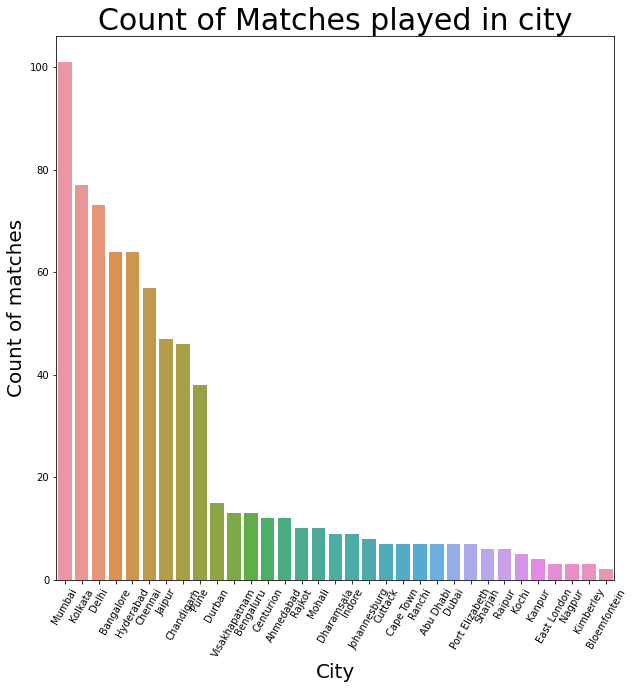

In [50]:
#Citywise distribution
plt.figure(figsize=(10,10))
sns.countplot(x='city', data=df_matches_new, order=df_matches_new['city'].value_counts().index)
plt.title('Count of Matches played in city', fontsize=30)
plt.xlabel('City', fontsize=20)
plt.ylabel('Count of matches',fontsize=20)
plt.xticks(rotation=60)
plt.show()

In [57]:
#No. of matches payed by each team
team_1=df_matches_new.groupby(['team1']).count()
team_2=df_matches_new.groupby(['team2']).count()
match_count=team1['id']+team2['id']
match_count=pd.DataFrame(match_count, columns=['count'])
match_count.reset_index(inplace=True)

In [59]:
match_count.head()

,team1,id
0,Chennai Super Kings,164
1,Deccan Chargers,75
2,Delhi Capitals,16
3,Delhi Daredevils,159
4,Gujarat Lions,30


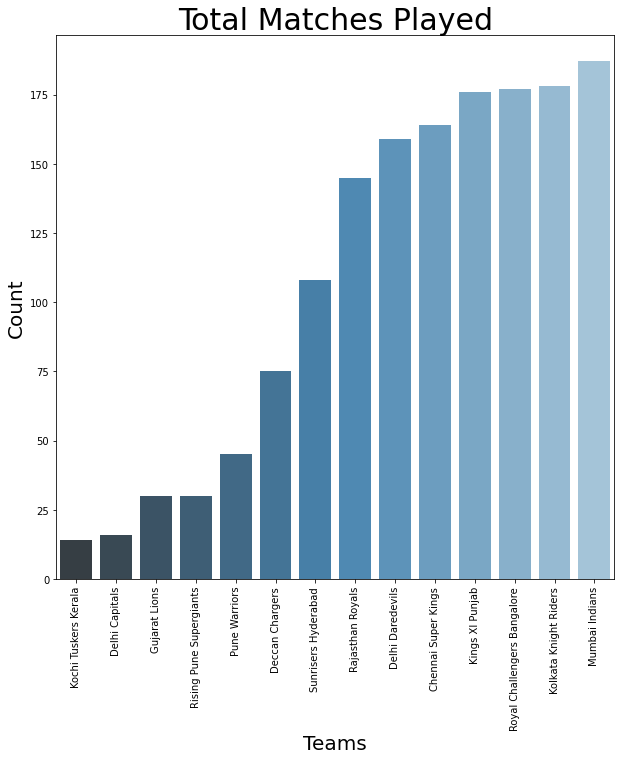

In [68]:
plt.figure(figsize=(10,10))
sns.barplot(x='team1',y='id',data=match_count,order=match_count.sort_values(by=['id'])['team1'], palette='Blues_d')
plt.title('Total Matches Played', fontsize=30)
plt.xlabel('Teams',fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Comparing total number of matches played with total matches payed by teams
#Count of total number of matches is high in year 2011, 2012, 2013 were high, as 2 more teams were there.

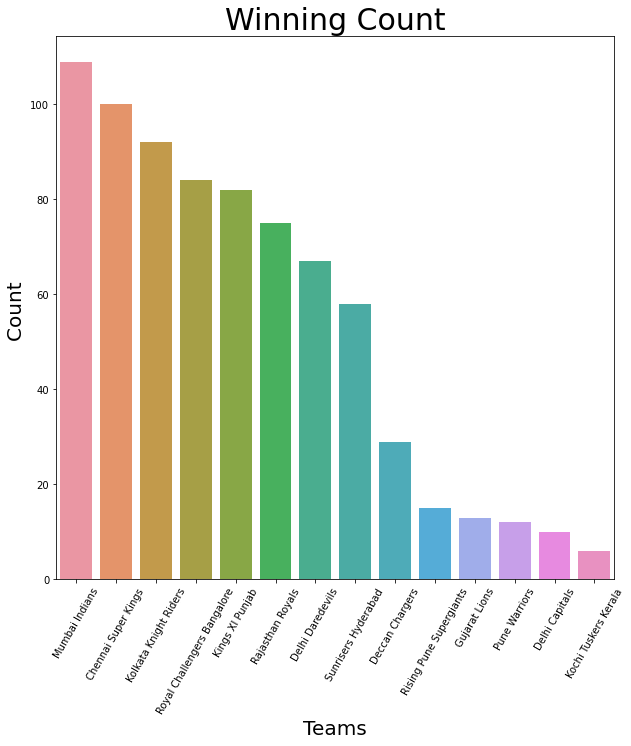

In [53]:
#Maximum win by team in all seasons
plt.figure(figsize=(10,10))
sns.countplot(x='winner', data=df_matches_new, order=df_matches_new['winner'].value_counts().index)
plt.title('Winning Count', fontsize=30)
plt.xlabel('Teams', fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=60)
plt.show()

In [ ]:
#Comparing all seasons maximum number of matches won by team 'Mumbai Indians'

In [70]:
#Matches won and lost out of total matches
match_winner=df_matches_new[['id','winner']].groupby('winner').size().reset_index()

In [71]:
match_winner.head()

,winner,0
0,Chennai Super Kings,100
1,Deccan Chargers,29
2,Delhi Capitals,10
3,Delhi Daredevils,67
4,Gujarat Lions,13


In [73]:
match_winner.columns=['team1','win_count']
match_winner.head()

,team1,win_count
0,Chennai Super Kings,100
1,Deccan Chargers,29
2,Delhi Capitals,10
3,Delhi Daredevils,67
4,Gujarat Lions,13


In [74]:
match_count_new=pd.merge(match_count,match_winner,on='team1' )
match_count_new['lost_count']=match_count_new['id']-match_count_new['win_count']
match_count_new.head()

,team1,id,win_count,lost_count
0,Chennai Super Kings,164,100,64
1,Deccan Chargers,75,29,46
2,Delhi Capitals,16,10,6
3,Delhi Daredevils,159,67,92
4,Gujarat Lions,30,13,17


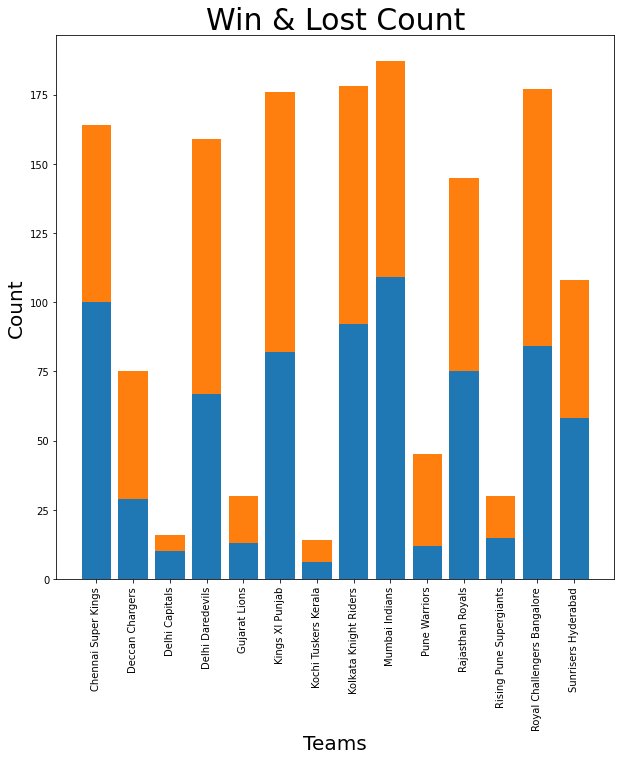

In [88]:
plt.figure(figsize=(10,10))
plt.bar(x=match_count_new['team1'],height=match_count_new['id'])
plt.bar(x=match_count_new['team1'],height=match_count_new['lost_count'],bottom=match_count_new['win_count'])
plt.title('Win & Lost Count', fontsize=30)
plt.xlabel('Teams',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=90)
plt.show()
#Blue color->Win matches count
#Orange color->Lost matches count

In [111]:
#EDA for toss decision
toss=df_matches_new[['id','team1','team2','toss_winner','toss_decision','winner']].groupby(['team1','team2','toss_winner','toss_decision','winner']).size().reset_index()
toss.columns=['team1','team2','toss_winner','toss_decision','winner','total']
#toss=toss.unstack()
#toss=toss.reset_index()
#toss=toss.fillna(0)
toss.head()

,team1,team2,toss_winner,toss_decision,winner,total
0,Chennai Super Kings,Deccan Chargers,Chennai Super Kings,bat,Chennai Super Kings,4
1,Chennai Super Kings,Deccan Chargers,Chennai Super Kings,bat,Deccan Chargers,1
2,Chennai Super Kings,Deccan Chargers,Deccan Chargers,field,Chennai Super Kings,1
3,Chennai Super Kings,Deccan Chargers,Deccan Chargers,field,Deccan Chargers,2
4,Chennai Super Kings,Delhi Capitals,Delhi Capitals,field,Chennai Super Kings,1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Royal Challengers Bangalore'),
  Text(1, 0, 'Rising Pune Supergiants'),
  Text(2, 0, 'Kolkata Knight Riders'),
  Text(3, 0, 'Kings XI Punjab'),
  Text(4, 0, 'Sunrisers Hyderabad'),
  Text(5, 0, 'Mumbai Indians'),
  Text(6, 0, 'Gujarat Lions'),
  Text(7, 0, 'Delhi Daredevils'),
  Text(8, 0, 'Chennai Super Kings'),
  Text(9, 0, 'Rajasthan Royals'),
  Text(10, 0, 'Deccan Chargers'),
  Text(11, 0, 'Kochi Tuskers Kerala'),
  Text(12, 0, 'Pune Warriors'),
  Text(13, 0, 'Delhi Capitals')])

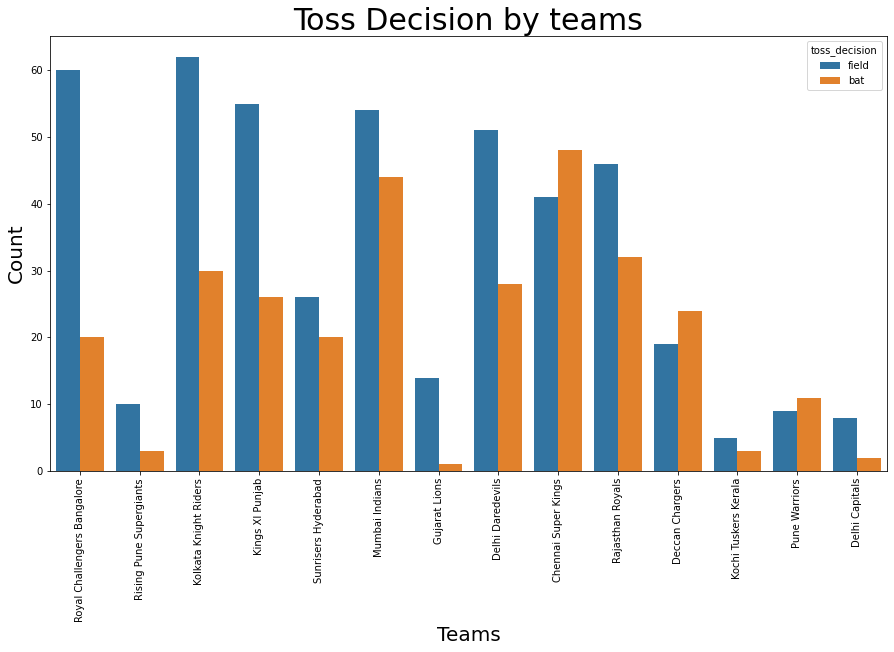

In [107]:
#Toss decision by teams
plt.figure(figsize=(15,8))
sns.countplot(x='toss_winner',hue='toss_decision',data=df_matches_new)
plt.title('Toss Decision by teams',fontsize=30)
plt.xlabel('Teams',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=90)

In [ ]:
#Teams who won the toss and also won the match


In [22]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df_matches_new['team1_new']=encoder.fit_transform(df_matches_new['team1'])
df_matches_new['team2_new']=encoder.fit_transform(df_matches_new['team2'])
df_matches_new['winner_new']=encoder.fit_transform(df_matches_new['winner'])
df_matches_new['toss_winner_new']=encoder.fit_transform(df_matches_new['toss_winner'])

In [21]:
df_matches_new.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,team1_new,team2_new,winner_new,toss_winner_new
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,No Umpire,13,12,13,12
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,...,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,No Umpire,8,11,11,11
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,...,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,No Umpire,4,7,7,7
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,...,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,No Umpire,11,5,5,5
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,...,0,KM Jadhav,M Chinnaswamy Stadium,No Umpire,No Umpire,No Umpire,12,3,12,12


In [22]:
df_matches_new

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,team1_new,team2_new,winner_new,toss_winner_new
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,No Umpire,13,12,13,12
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,...,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,No Umpire,8,11,11,11
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,...,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,No Umpire,4,7,7,7
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,...,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,No Umpire,11,5,5,5
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,...,0,KM Jadhav,M Chinnaswamy Stadium,No Umpire,No Umpire,No Umpire,12,3,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,...,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,7,8,8,8
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,...,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,0,8,8,0
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,...,2,RR Pant,ACA-VDCA Stadium,No Umpire,No Umpire,No Umpire,13,2,2,2
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,...,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,2,0,0,0


In [23]:
df_matches_new.loc[df_matches_new['winner_new']==df_matches_new['team1_new'],'team1_win']=1
df_matches_new.loc[df_matches_new['winner_new']!=df_matches_new['team1_new'],'team1_win']=0

In [24]:
df_matches_new.loc[df_matches_new['toss_winner_new']==df_matches_new['team1_new'],'team1_toss_win']=1
df_matches_new.loc[df_matches_new['toss_winner_new']!=df_matches_new['team1_new'],'team1_toss_win']=0

In [25]:
df_matches_new['team1_bat']=0
df_matches_new.loc[(df_matches_new['team1_toss_win']==1) & (df_matches_new['toss_decision']=='bat'),'team1_bat']=1

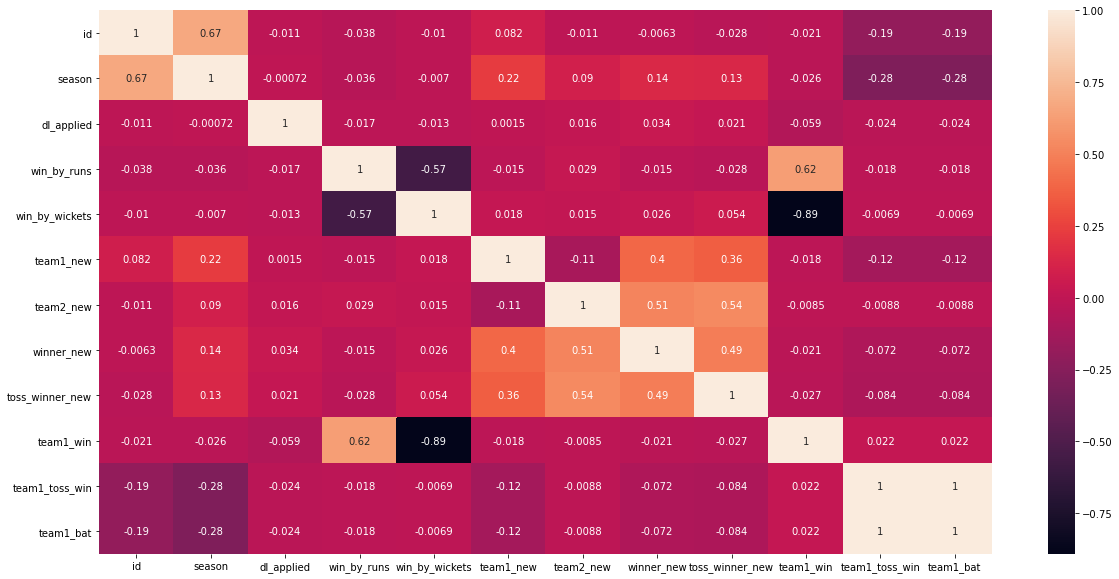

In [26]:
%matplotlib inline
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df_matches_new.corr(),annot = True)
plt.show()

In [27]:
df_matches_new=df_matches_new.drop(['team1_bat'],1)

In [28]:
df_matches_new.head(20)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,venue,umpire1,umpire2,umpire3,team1_new,team2_new,winner_new,toss_winner_new,team1_win,team1_toss_win
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,No Umpire,13,12,13,12,1.0,0.0
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,...,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,No Umpire,8,11,11,11,0.0,0.0
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,...,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,No Umpire,4,7,7,7,0.0,0.0
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,...,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,No Umpire,11,5,5,5,0.0,0.0
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,...,M Chinnaswamy Stadium,No Umpire,No Umpire,No Umpire,12,3,12,12,1.0,1.0
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,...,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,No Umpire,4,13,13,13,0.0,0.0
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,...,Wankhede Stadium,Nitin Menon,CK Nandan,No Umpire,7,8,8,8,0.0,0.0
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,...,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,No Umpire,12,5,5,12,0.0,1.0
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,...,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,No Umpire,3,11,3,11,1.0,0.0
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,...,Wankhede Stadium,Nitin Menon,CK Nandan,No Umpire,13,8,8,8,0.0,0.0


In [29]:
df_matches_new.tail(20)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,venue,umpire1,umpire2,umpire3,team1_new,team2_new,winner_new,toss_winner_new,team1_win,team1_toss_win
735,11331,2019,Jaipur,22/04/19,Rajasthan Royals,Delhi Capitals,Delhi Capitals,field,normal,0,...,Sawai Mansingh Stadium,S Ravi,Nanda Kishore,Yeshwant Barde,10,2,2,2,0.0,0.0
736,11332,2019,Chennai,23/04/19,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,...,M. A. Chidambaram Stadium,Nigel Llong,Anil Chaudhary,Vineet Kulkarni,13,0,0,0,0.0,0.0
737,11333,2019,Bengaluru,24/04/19,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,...,M. Chinnaswamy Stadium,Bruce Oxenford,C Shamshuddin,Rod Tucker,12,5,12,5,1.0,0.0
738,11334,2019,Kolkata,25/04/19,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,field,normal,0,...,Eden Gardens,Ian Gould,Anil Dandekar,Nitin Menon,7,10,10,10,0.0,0.0
739,11335,2019,Chennai,26/04/19,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,...,M. A. Chidambaram Stadium,Nigel Llong,Anil Chaudhary,Vineet Kulkarni,8,0,8,0,1.0,0.0
740,11336,2019,Jaipur,27/04/19,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,...,Sawai Mansingh Stadium,Yeshwant Barde,Nand Kishore,Sundaram Ravi,13,10,10,10,0.0,0.0
741,11337,2019,Delhi,28/04/19,Delhi Capitals,Royal Challengers Bangalore,Delhi Capitals,bat,normal,0,...,Feroz Shah Kotla Ground,Bruce Oxenford,KN Ananthapadmanabhan,C Shamshuddin,2,12,2,2,1.0,1.0
742,11338,2019,Kolkata,28/04/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,...,Eden Gardens,Ian Gould,Nitin Menon,Anil Dandekar,7,8,7,8,1.0,0.0
743,11339,2019,Hyderabad,29/04/19,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,...,Rajiv Gandhi Intl. Cricket Stadium,S Ravi,O Nandan,Nanda Kishore,13,5,13,5,1.0,0.0
745,11341,2019,Chennai,01/05/19,Chennai Super Kings,Delhi Capitals,Delhi Capitals,field,normal,0,...,M. A. Chidambaram Stadium,Anil Dandekar,Nitin Menon,Ian Gould,0,2,0,2,1.0,0.0


In [30]:
df=pd.DataFrame({'team1':df_matches_new['team1_new'], 'team2':df_matches_new['team2_new'], 'winner':df_matches_new['winner_new']})

In [31]:
from sklearn.model_selection import KFold
from sklearn import metrics

def pred_model(model, data, predictors, win):
    model.fit(data[predictors], data[win])
    predictions=model.predict(data[predictors])
    accuracy=metrics.accuracy_score(predictions, data[win])
    #kf=KFold(data.shape[0], n_splits=5)
    #error=[]
    #for train, test in kf.split():
    #    train_predictors=(data[predictors].values[train,:])
    #    train_target=data[win].values[train]
    #    model.fit(train_predictors, train_target)
    #    error.append(model.score(data[predictors].values[test,:], data[win].values[test]))
        
    model.fit(data[predictors], data[win])
    

In [32]:
#Winner of the match

In [33]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
output_var=['winner']
prediction_var=['team1', 'team2']
pred_model(model, df, prediction_var, output_var)

In [ ]:
df.head()

In [40]:
team1=8
team2=10
#x=encoder.fit_transform[team1]
#y=encoder.fit_transform[team2]
input=[team1, team2]
input=np.array(input).reshape((1,-1))
output=model.predict(input)

In [41]:
print(output)

[10]


In [36]:
team1=8
team2=10
#x=encoder.fit_transform[team1]
#y=encoder.fit_transform[team2]
input=[team1, team2]
input=np.array(input).reshape((1,-1))
output=model.predict(input)

In [37]:
print(output)

[10]


In [42]:
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [43]:
df_deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [44]:
df_deliveries_new=df_deliveries.dropna(subset=['fielder'])

In [45]:
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [46]:
 df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [47]:
df_deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [48]:
df_deliveries['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [49]:
df_deliveries['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

In [50]:
df_deliveries['batting_team']=df_deliveries['batting_team'].replace("Rising Pune Supergiant", "Rising Pune Supergiants")
df_deliveries['bowling_team']=df_deliveries['bowling_team'].replace("Rising Pune Supergiant", "Rising Pune Supergiants")

In [51]:
df_deliveries['batting_team_new']=encoder.fit_transform(df_deliveries['batting_team'])
df_deliveries['bowling_team_new']=encoder.fit_transform(df_deliveries['bowling_team'])
df_deliveries['batsman_new']=encoder.fit_transform(df_deliveries['batsman'])
df_deliveries['non_striker_new']=encoder.fit_transform(df_deliveries['non_striker'])

In [52]:
df_deliveries['bowler']=encoder.fit_transform(df_deliveries['bowler'])

In [53]:
df_deliveries.loc[df_deliveries['player_dismissed']==df_deliveries['batsman'],'batting_team_out']=1
df_deliveries.loc[df_deliveries['player_dismissed']!=df_deliveries['batsman'],'batting_team_out']=0

In [54]:
df_deliveries.loc[df_deliveries['batsman_runs']==4,'boundries']=1
df_deliveries.loc[df_deliveries['batsman_runs']==6,'boundries']=1
df_deliveries.loc[df_deliveries['batsman_runs']!=4,'boundries']=0
df_deliveries.loc[df_deliveries['batsman_runs']!=4,'boundries']=0

In [55]:
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,total_runs,player_dismissed,dismissal_kind,fielder,batting_team_new,bowling_team_new,batsman_new,non_striker_new,batting_team_out,boundries
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,379,0,...,0,NaN,NaN,NaN,13,12,112,391,0.0,0.0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,379,0,...,0,NaN,NaN,NaN,13,12,112,391,0.0,0.0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,379,0,...,4,NaN,NaN,NaN,13,12,112,391,0.0,1.0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,379,0,...,0,NaN,NaN,NaN,13,12,112,391,0.0,0.0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,379,0,...,2,NaN,NaN,NaN,13,12,112,391,0.0,0.0


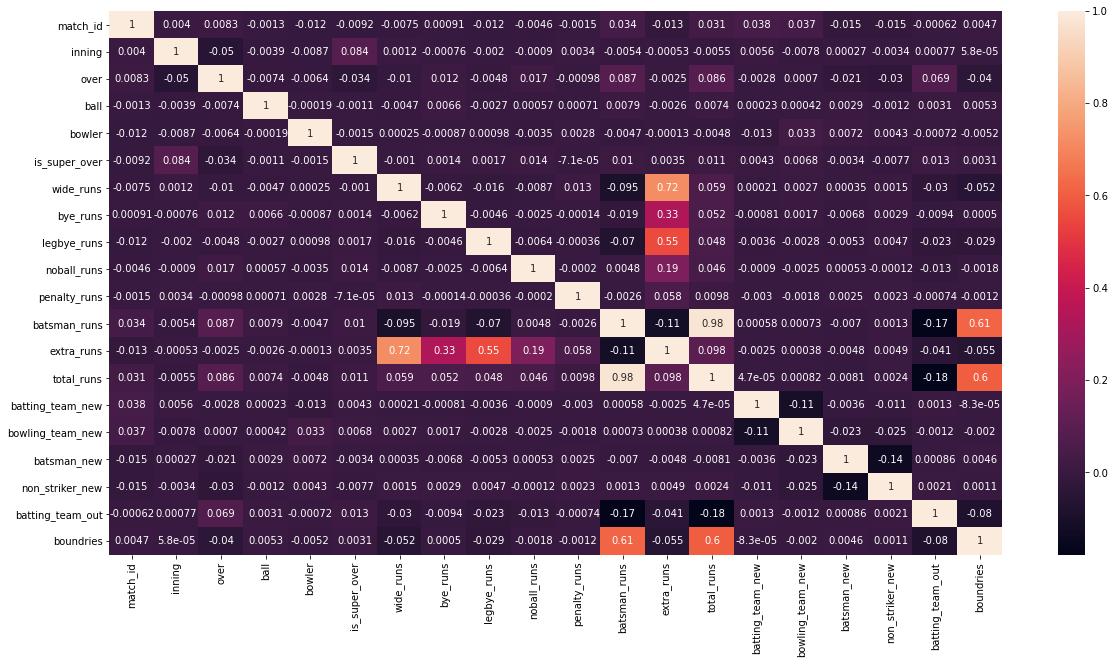

In [56]:
%matplotlib inline
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df_deliveries.corr(),annot = True)
plt.show()

In [57]:
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,total_runs,player_dismissed,dismissal_kind,fielder,batting_team_new,bowling_team_new,batsman_new,non_striker_new,batting_team_out,boundries
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,379,0,...,0,NaN,NaN,NaN,13,12,112,391,0.0,0.0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,379,0,...,0,NaN,NaN,NaN,13,12,112,391,0.0,0.0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,379,0,...,4,NaN,NaN,NaN,13,12,112,391,0.0,1.0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,379,0,...,0,NaN,NaN,NaN,13,12,112,391,0.0,0.0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,379,0,...,2,NaN,NaN,NaN,13,12,112,391,0.0,0.0


In [58]:
df_deliveries_new=pd.DataFrame({'match_id':df_deliveries['match_id'],'batting_team':df_deliveries['batting_team_new'], 'bowling_team':df_deliveries['bowling_team_new'], 'total_runs':df_deliveries['total_runs'], 'inning':df_deliveries['inning'], 'over':df_deliveries['over'],'ball':df_deliveries['ball'],'wickets':df_deliveries['batting_team_out'], 'boundries':df_deliveries['boundries'],'batsman_new':df_deliveries['batsman'], 'non_striker_new':df_deliveries['non_striker']})

In [59]:
df_deliveries_new.wickets=df_deliveries_new.wickets.astype('int64')
df_deliveries_new.boundries=df_deliveries_new.boundries.astype('int64')

In [60]:
df_deliveries_new.head(15)

,match_id,batting_team,bowling_team,total_runs,inning,over,ball,wickets,boundries,batsman_new,non_striker_new
0,1,13,12,0,1,1,1,0,0,DA Warner,S Dhawan
1,1,13,12,0,1,1,2,0,0,DA Warner,S Dhawan
2,1,13,12,4,1,1,3,0,1,DA Warner,S Dhawan
3,1,13,12,0,1,1,4,0,0,DA Warner,S Dhawan
4,1,13,12,2,1,1,5,0,0,DA Warner,S Dhawan
5,1,13,12,0,1,1,6,0,0,S Dhawan,DA Warner
6,1,13,12,1,1,1,7,0,0,S Dhawan,DA Warner
7,1,13,12,1,1,2,1,0,0,S Dhawan,DA Warner
8,1,13,12,4,1,2,2,0,1,DA Warner,S Dhawan
9,1,13,12,1,1,2,3,0,0,DA Warner,S Dhawan


In [61]:
def pred_model2(model, data, predictors, run):
    model.fit(data[predictors], data[run])
    predictions=model.predict(data[predictors])
    accuracy=metrics.accuracy_score(predictions, data[run])
    #print('Accuracy' .formt(accuracy))
    #kf=KFold(data.shape[0], n_splits=5)
    #error=[]
    #for train, test in kf.split():
    #    train_predictors=(data[predictors].values[train,:])
    #    train_target=data[win].values[train]
    #    model.fit(train_predictors, train_target)
    #    error.append(model.score(data[predictors].values[test,:], data[win].values[test]))
        
   
    

In [ ]:
#Total run in 1 inning

In [62]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100, random_state=42, min_samples_leaf=1)
output_var=['total_runs']
prediction_var=['batting_team', 'bowling_team', 'inning', 'over', 'ball']
pred_model2(model, df_deliveries_new, prediction_var, output_var)

In [65]:
batting_team=8
bowling_team=10
inning=1
df2=[]
#over=range(1,20)
#ball=range(1,7)
#x=encoder.fit_transform[team1]
#y=encoder.fit_transform[team2]
for over in range (1,20) :
    for ball in range (1,7):
        input=[batting_team, bowling_team, inning, over, ball]
        input=np.array(input).reshape((1,-1))
        output=model.predict(input)
        df2.append(output)

In [66]:
print(sum(df2))

[77]


In [ ]:
#total wickets in match

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
output_var=['wickets']
prediction_var=['batting_team', 'bowling_team', 'inning', 'over', 'ball']
pred_model2(model, df_deliveries_new, prediction_var, output_var)

In [67]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100, random_state=42, min_samples_leaf=1)
output_var=['wickets']
prediction_var=['batting_team', 'bowling_team', 'inning', 'over', 'ball']
pred_model2(model, df_deliveries_new, prediction_var, output_var)

In [68]:
batting_team=10
bowling_team=8
inning=1
df3=[]
#over=range(1,20)
#ball=range(1,7)
#x=encoder.fit_transform[team1]
#y=encoder.fit_transform[team2]
for over in range (1,20) :
    for ball in range (1,7):
        input=[batting_team, bowling_team, inning, over, ball]
        input=np.array(input).reshape((1,-1))
        output=model.predict(input)
        df3.append(output)

In [69]:
batting_team=8
bowling_team=10
inning=1
df9=[]
#over=range(1,20)
#ball=range(1,7)
#x=encoder.fit_transform[team1]
#y=encoder.fit_transform[team2]
for over in range (1,20) :
    for ball in range (1,7):
        input=[batting_team, bowling_team, inning, over, ball]
        input=np.array(input).reshape((1,-1))
        output=model.predict(input)
        df9.append(output)

In [70]:
print(sum(df3)+sum(df9))

[0]


In [ ]:
#Total runs scored in last 5 overs for both the innings

In [71]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier(n_estimators=100, random_state=42, min_samples_leaf=1)
output_var=['total_runs']
prediction_var=['batting_team', 'bowling_team', 'over', 'ball']
pred_model2(model1, df_deliveries_new, prediction_var, output_var)

In [72]:
batting_team=10
bowling_team=8
inning=1
df4=[]
#over=range(1,20)
#ball=range(1,7)
#x=encoder.fit_transform[team1]
#y=encoder.fit_transform[team2]
for over in range (15,20) :
    for ball in range (1,7):
        input=[batting_team, bowling_team, over, ball]
        input=np.array(input).reshape((1,-1))
        output=model1.predict(input)
        df4.append(output)

In [73]:
batting_team=8
bowling_team=10
inning=1
df5=[]
#over=range(1,20)
#ball=range(1,7)
#x=encoder.fit_transform[team1]
#y=encoder.fit_transform[team2]
for over in range (15,20) :
    for ball in range (1,7):
        input=[batting_team, bowling_team, over, ball]
        input=np.array(input).reshape((1,-1))
        output=model1.predict(input)
        df5.append(output)

In [74]:
print(sum(df5)+sum(df4))

[50]


In [ ]:
#Boundaries in match

In [ ]:
df_deliveries_new.head()

In [75]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier(n_estimators=100, random_state=42, min_samples_leaf=1)
output_var=['boundries']
prediction_var=['batting_team', 'bowling_team', 'over', 'ball']
pred_model2(model1, df_deliveries_new, prediction_var, output_var)

In [76]:
batting_team=10
bowling_team=8
inning=1
df6=[]
#over=range(1,20)
#ball=range(1,7)
#x=encoder.fit_transform[team1]
#y=encoder.fit_transform[team2]
for over in range (1,20) :
    for ball in range (1,7):
        input=[batting_team, bowling_team, over, ball]
        input=np.array(input).reshape((1,-1))
        output=model1.predict(input)
        df6.append(output)

In [77]:
batting_team=8
bowling_team=10
inning=1
df7=[]
#over=range(1,20)
#ball=range(1,7)
#x=encoder.fit_transform[team1]
#y=encoder.fit_transform[team2]
for over in range (1,20) :
    for ball in range (1,7):
        input=[batting_team, bowling_team, over, ball]
        input=np.array(input).reshape((1,-1))
        output=model1.predict(input)
        df7.append(output)

In [78]:
print(sum(df6)+sum(df7))

[0]
